In [1]:
import matplotlib.pyplot as plt
import glob
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import numpy as np
from scipy.stats.stats import pearsonr 
image = plt.imread('yalefaces/subject01.happy.gif')
image_downscaled = downscale_local_mean(image, (4, 4))
image_shape = image_downscaled.shape


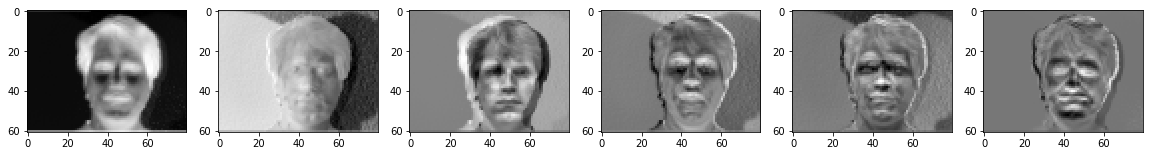

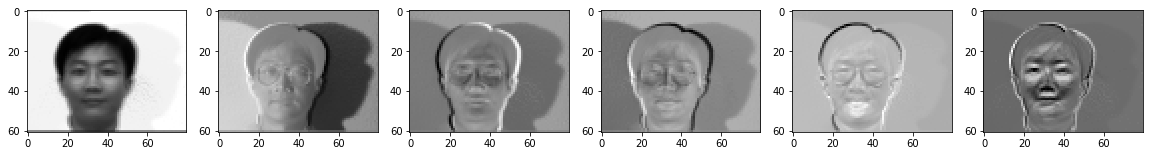

In [31]:
d = {s:{} for s in ['01','14']}
for subj in ['01','14']:

    image_list = []
    images = glob.glob('yalefaces/subject{}.*'.format(subj))
    for img in images:
        image = plt.imread(img)
        image_downscaled = downscale_local_mean(image, (4, 4))
        flat = image_downscaled.flatten()
        image_list.append(flat)
        m,n = image_downscaled.shape
    X = np.stack(image_list, axis = 1)
    X_centered = (X - np.mean(X, axis = 0)) / np.std(X, axis=0)
    
    u = np.cov(X_centered.T)
    eig_val,eig_vec=np.linalg.eig(u)
    
    
    
    e_faces = []
    fig, ax = plt.subplots(1,6,figsize=(20, 10))
    for i in range(6):
        e_face = np.dot(X_centered,eig_vec[:,i]).reshape(m,n)
        e_faces.append(e_face)
        ax[i].imshow(e_face,cmap='gray')
        
    for img in ['yalefaces/subject01-test.gif','yalefaces/subject14-test.gif']:
        image = plt.imread(img)
        image_downscaled = downscale_local_mean(image, (4, 4))
        flat = image_downscaled.flatten()
        flat_centered = (flat - np.mean(flat, axis = 0)) / np.std(flat, axis=0)
        scores = []
        for e_face in e_faces:
            e_flat = e_face.flatten()
            scores.append(np.dot(e_flat.T,flat_centered))
            
        d[subj].update({img:sum(scores[1:])/len(scores[1:])})

In [32]:
d

{'01': {'yalefaces/subject01-test.gif': 235.1105375260685,
  'yalefaces/subject14-test.gif': -435.1520088185474},
 '14': {'yalefaces/subject01-test.gif': 624.1247331627885,
  'yalefaces/subject14-test.gif': -39.71707344178291}}

In [173]:
image = plt.imread('yalefaces/subject14-test.gif')
image_downscaled = downscale_local_mean(image, (4, 4))
flat = image_downscaled.flatten()


The first jth eigenvectors represent, the most prominent features of a given individual.  Projecting the test image onto the eigenvalue is similar to finding the correlation between a new photo and a person's most prominent feature represented as an eigenface.

In [174]:
np.dot(e_faces.flatten().reshape(1,4880), flat.reshape(4880,1))

array([[-3682.61060155]])